In [13]:
import numpy as np
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw
from IPython.display import Image as display_image

In [72]:
class okiya():
    
    def __init__(self):
        self.tiles = np.array([i for i in range(0,16)]).reshape([4,4])
        
    def step(self, action):
        reward = 0
        done = 0
        return reward, done
    
    def reset(self):
        tiles_reshaped = self.tiles.reshape([16])
        np.random.shuffle(tiles_reshaped)
        self.tiles = tiles_reshaped.reshape([4,4])
    
    def render(self, draw_numbers = True, hi_res = True):
        i = 0
        tile_row = None
        for row in range(4):
            for col in range(4):            
                tile_id = str(self.tiles[row][col])

                if hi_res:
                    filename = 'higardentile'+tile_id+'.png'
                    im = Image.open('images/'+filename)
                    im = im.resize((464,464), Image.ANTIALIAS)
                    number_size = 320
                else:
                    filename = 'lowgardentile'+tile_id+'.png'
                    im = Image.open('images/'+filename)
                    im = im.resize((115,115), Image.ANTIALIAS)
                    number_size = 80

                if draw_numbers:
                    if tile_id == '16':
                        tile_id = 'P0'
                    elif tile_id == '17':
                        tile_id = 'P1'
                    im = self.draw_text(tile_id, number_size, (50, 255, 50), im)

                if col == 0:
                    tile = np.array(im)
                else:
                    tile_r = np.array(im)
                    tile = np.concatenate((tile, tile_r), axis=1)
                i += 1
            if row == 0:
                tile_row = tile
            else:
                tile_row = np.concatenate((tile_row, tile), axis=0)

        im = Image.fromarray(tile_row)
        img_path = 'images/tiles.png'
        im.save(img_path)        
        return img_path
    
    def draw_text(self, text, font_size, color, img):
        font = ImageFont.truetype("/usr/share/fonts/truetype/freefont/FreeMono.ttf", font_size, encoding="unic")
        draw = ImageDraw.Draw(img)
        w, h = draw.textsize(text, font)
        draw.text(((img.width - w) / 2, (img.height - h) / 2), text, color, font)
        return img

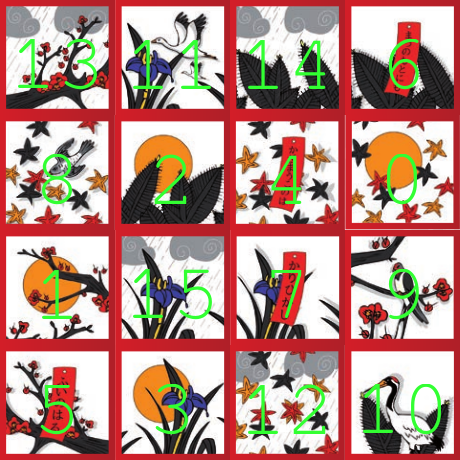

In [71]:
game = okiya()
game.reset()
img_path = game.render(hi_res = False)
display_image(img_path)